<a href="https://colab.research.google.com/github/tomas-tourn/phyton-ciencia-de-datos/blob/main/TP4_Comision_4_Tourn_(terminado).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TRABAJO PRACTICO N 4**

**Trabajo Practico Nº 4**
Analisis sobre data set

1= Buscar los siguiente data set en la web
* Titanic
* Iris
* Wine
* Indian Diabetes

2- Explicar un data set , sus diferente Variables\
3- Deside justificando tu respuesta que tipo de categoria de variable son\
4- Detectar y arreglar los siguientes coceptos
* Valores Ausente
* Valores Atipicos

5- Sobre el dataset elegido , ¿se puede eliminar alguna fila o columna?\

6- Realizar analisis univariados
* Grafico de frecuencia
* Grafico de torta
* Histograma
* etc

7- En base a los graficos del punto 6 realizar distintas concluciones\

8- Realizar analisis de matriz corelacion y explicar que variable estan correlacionadas\

PD Pueden Buscar data set de kaggle

## De los 4 data set buscados el mas relacionado a mis estudios de biotecnología fue el de Iris por lo tanto lo elegí para analizar.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)

df.head(11)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


**2) Explicación del dataset**:
El dataset toma 150 objetos de estudio, en este caso flores de Iris, las cuales analiza a partir de 5 variables, o caracteristicas,  que describen morfológicamente a la flor.
Longitud y anchura del Sépalo, longitud y anchura del Pétalo y la variedad genética de la planta.

In [5]:
df.shape

(150, 5)

**3) ¿Qué tipo de variables son?**

In [6]:
tipos_de_variable = df.dtypes
print(tipos_de_variable)

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object



*   **sepal_length:** Variable numérica continua (flotante) que representa la longitud del sépalo en la flor iris
*   **sepal_width:** Variable numérica continua (flotante) que representa el ancho del sépalo en la flor iris.
*   **petal_length:** Variable numérica continua (flotante) que representa la longitud del pétalo en la flor iris.
*   **petal_width:** Variable numérica continua (flotante) que representa el ancho del pétalo en la flor iris.
*   **species:** Variable categórica (cadena de texto) que representa la especie de la flor iris (setosa, versicolor o virginica).

**4) detectar y arreglar los valores ausentes y atípicos.**

In [7]:
df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

No se detecta presencia de valores nulos

In [ ]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: >

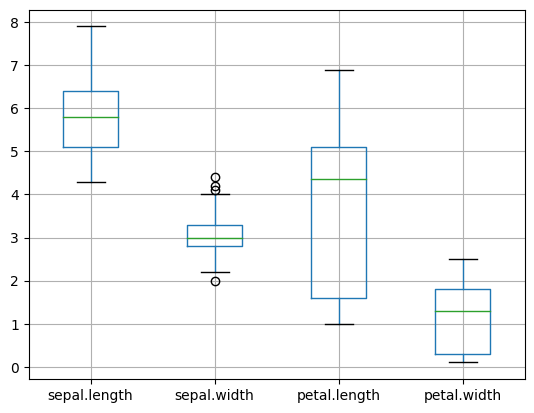

In [8]:
# creamos un boxplot para ver la posible presencia de outliers
df.boxplot()

In [9]:
def detect_outliers_iqr(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

columns_to_check = ["sepal.width"]
outliers_list = []
for col in columns_to_check:
    outliers = detect_outliers_iqr(df, col)
    outliers_list.append(outliers)

# Concatenamos todos los outliers encontrados en un solo DataFrame
outliers_df = pd.concat(outliers_list)

# Eliminamos los outliers del conjunto de datos original
data_cleaned = df.drop(outliers_df.index)

# Cantidad de outliers detectados
print("Número de outliers detectados:", len(outliers_df))

Número de outliers detectados: 4


(146, 5)

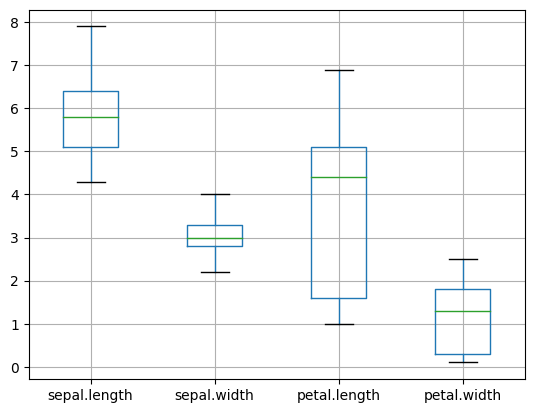

In [10]:
# Ahora mostramos los boxplot limpios de outliers
data_cleaned.boxplot()
data_cleaned.shape

**5) Al eliminar datos, podría perder información valiosa. Sin una razón sólida para eliminar filas o columnas ni la seguridad de comprender cómo afectará mi análisis diría que no puedo eliminarlas.**

**6 y 7) Análisis univariados y conclusiones**

1.   *Histograma y boxplots de las variables numéricas*



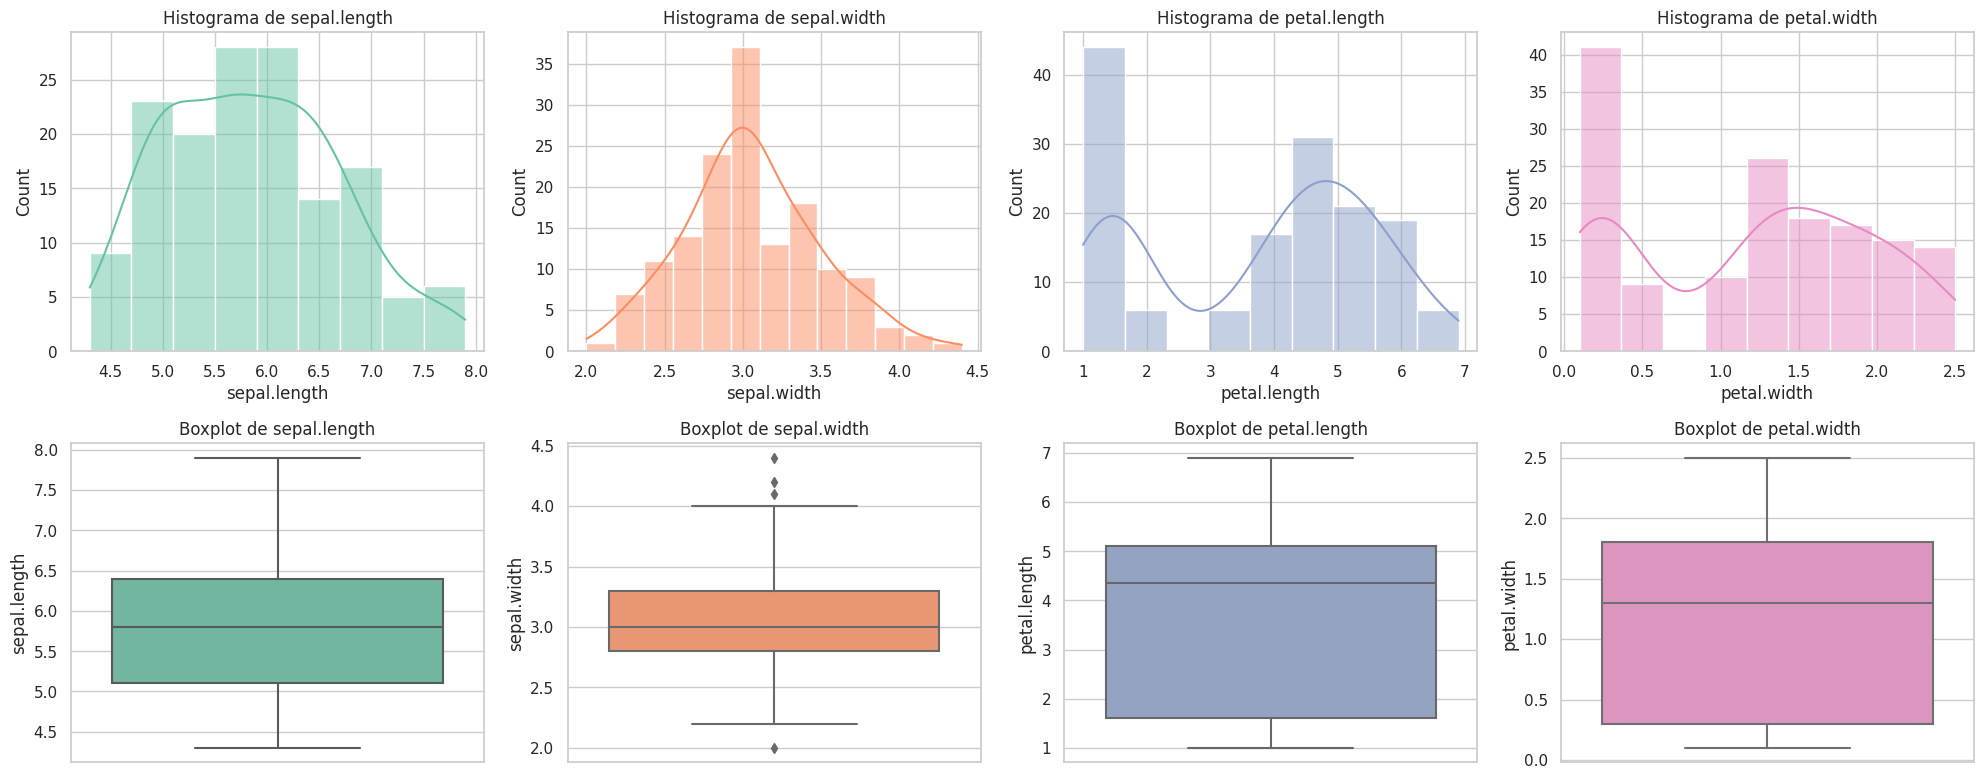

In [12]:
# Estilo y el tamaño de la figura
sns.set(style="whitegrid")
plt.figure(figsize=(20, 12))

numeric_vars = df.select_dtypes(include=['float64', 'int64']).columns

paleta_colores = sns.color_palette("Set2", n_colors=len(numeric_vars))

# Histograma y Boxplot para cada variable numérica
for i, var in enumerate(numeric_vars):
    # Histograma
    plt.subplot(3, 4, i + 1)
    sns.histplot(df[var], kde=True, color=paleta_colores[i])
    plt.title(f'Histograma de {var}')

    # Boxplot
    plt.subplot(3, 4, i + 5)
    sns.boxplot(data=df, y=var, color=paleta_colores[i])
    plt.title(f'Boxplot de {var}')

plt.tight_layout()
plt.show()

### En base a estos graficos puedo hacer las siguientes observaciones:

**Histogramas:** Las variables 'longitud del sépalo' y 'anchura del sépalo' tienen distribuciones aproximadamente normales.
La variable 'longitud del pétalo' muestra claramente dos grupos distintos de datos, lo que sugiere la presencia de dos subespecies o grupos de especies dentro del conjunto de datos 'iris'.
La variable 'anchura del pétalo' también muestra una distribución bimodal, lo que refuerza la idea de la existencia de dos grupos de especies.

**Boxplots:** Los boxplots proporcionan información sobre la dispersión y la presencia de valores atípicos en los datos.
En 'anchura del sépalo', se observan valores atípicos (outliers), lo que indica la presencia de valores que están significativamente alejados de la mayoría de los datos en esa variable.
En las variables ('longitud del pétalo' y 'anchura del pétalo'), no se observan valores atípicos aunque puede observarse una asimetría positiva o un sesgo a la derecha en su distribución.
Finalmente en a variable 'longitud del sépalo no se observan valores atípicos ni asimetria lo cual refuerza su característica de distribución normal.

2.   *Graficos de barra y de torta para la variable categórica*



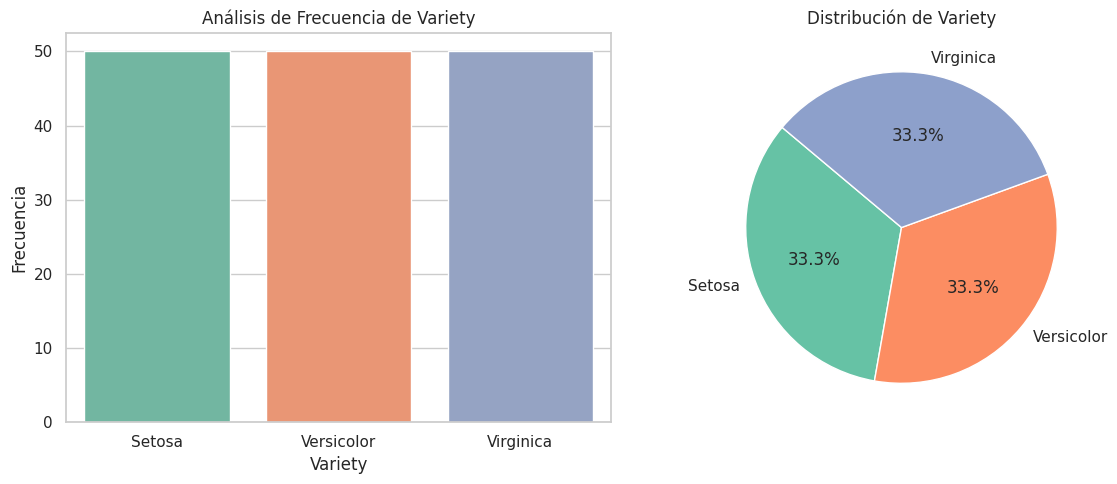

In [13]:

palette = sns.color_palette("Set2", n_colors=len(df['variety'].unique()))

# Estilo y el tamaño de la figura
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))

# Gráfico de barras
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='variety', palette=palette)
plt.xlabel('Variety')
plt.ylabel('Frecuencia')
plt.title('Análisis de Frecuencia de Variety')

# Gráfico de torta
plt.subplot(1, 2, 2)
variety_counts = df['variety'].value_counts()
plt.pie(variety_counts, labels=variety_counts.index, autopct='%1.1f%%', startangle=140, colors=palette)
plt.title('Distribución de Variety')

# Espacio entre los subgráficos
plt.tight_layout()

plt.show()

**Distribución de las Especies:**

En estos gráficos que muestran la distribución de especies, se puede observar que el conjunto de datos 'iris' contiene tres especies diferentes: setosa, versicolor y virginica.
En realidad no puedo sacar muchas mas conclusiónes de estas gráficas ya que solo muestran que se tomó la misma cantidad de muestras para cada especie. Sin embargo decidí mostrarlas porque era la unica variable categórica que me permitía mostrar este tipo de gráficos.

3. gráfico de densidad para las variables con distribuciones bimodales.

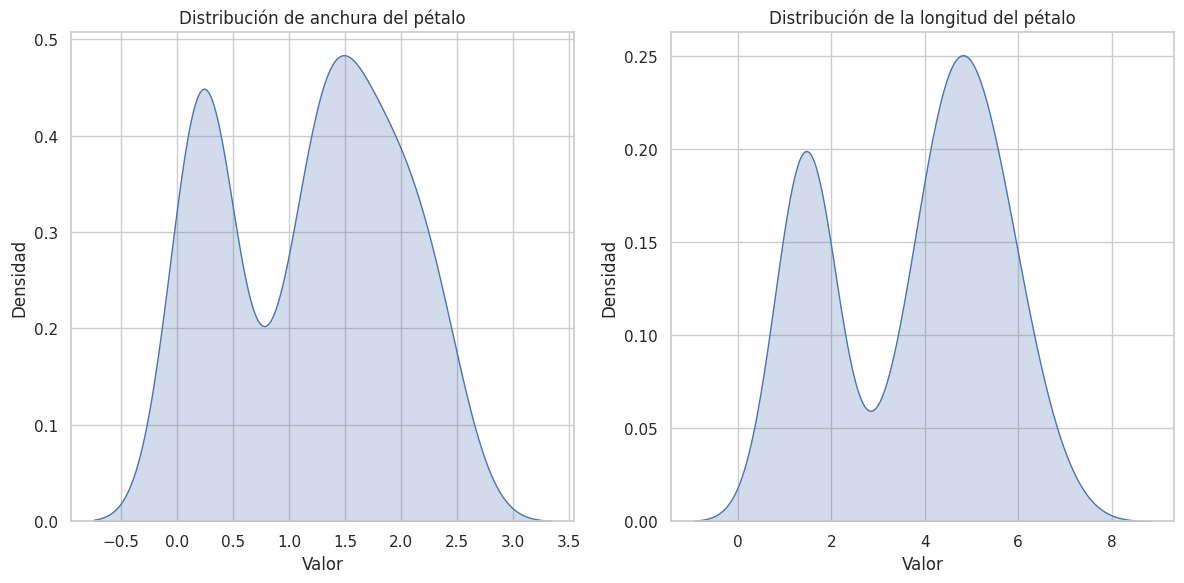

In [14]:
# Estilo de Seaborn
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

# Gráfico de densidad para 'petal_width'
plt.subplot(1, 2, 1)
sns.kdeplot(data=df['petal.width'], label='anchura del pétalo', fill=True)
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Distribución de anchura del pétalo')

# Gráfico de densidad para 'petal_length'
plt.subplot(1, 2, 2)
sns.kdeplot(data=df['petal.length'], label='longitud del pétalo', fill=True)
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Distribución de la longitud del pétalo')

# Ajustar el espacio entre los subgráficos
plt.tight_layout()

# Mostrar los gráficos de densidad
plt.show()

A partir de estos gráficos de densidad, se puede concluir que tanto 'anchura del pétalo' como 'longitud del pétalo' tienen distribuciones bimodales, lo que sugiere la presencia de dos grupos distintos en los datos. Esta información refuerza la observación hecha en el histográma de frecuencias que analizamos anteriormente y que las diferencias en estas características pueden ser indicativas de las diferentes especies de iris.

**8)  analisis de matriz corelacion y correlación entre variables**

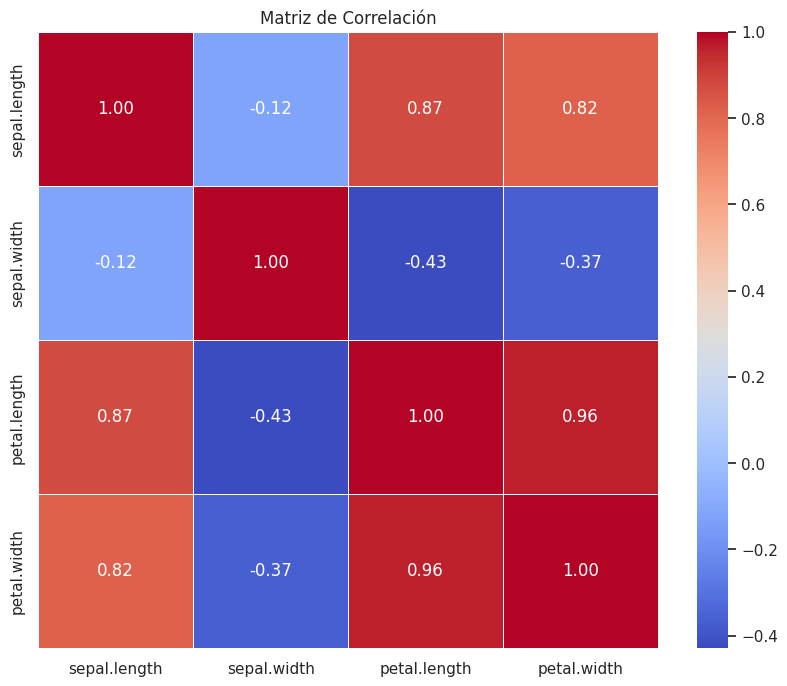

In [15]:
correlation_matrix = df.corr(numeric_only=True)

# Crear un mapa de calor (heatmap) de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

Al observar el mapa de calor de la matriz de correlación de las variables, puedo apreciar las siguientes correlaciones considerables:

Hay una fuerte correlación positiva ***0.96*** entre el largo de pétalo y el ancho de pétalo. Esto tiene sentido ya que en general, las flores con pétalos más largos tienden a tener pétalos más anchos, y viceversa.

Existe tambien una correlación positiva moderada ***0.87*** entre el largo de sépalo y el largo del pétalo. Esto nos sugiere que, en general, las flores con sépalos más largos también tienden a tener pétalos más largos.

De similar manera, la longitud del sépalo también muestra una correlación positiva moderada ***0.82*** con la anchura del pétalo. Entonces, en general, las flores con sépalos más largos tienden a tener pétalos más anchos.

El ancho de sépalo muestra correlaciones más débiles con otras variables en comparación con las correlaciones mencionadas anteriormente. Esto sugiere que el ancho del sépalo tiene una influencia menos pronunciada en las otras características.